# Casualty Analysis of Road Accidents in the UK

## Introduction

Multiple datasets were collated to create a single casualty dataset, to which selected predictive machine learning models will be applied.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
cas = pd.read_csv("./data/working_sets/final_cas.csv")

In [3]:
# drop identifier column
cas = cas.drop(["acc_veh_cas_ref"], axis=1)

In [4]:
cas.describe()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,road_maintenance_ped,...,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_rural,police_attended,vehicle_type,propulsion_code,age_band_of_driver,adjusted_severity_bin
count,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,...,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000,934335.000000
mean,1.457906,1.444167,37.126567,6.408401,2.858086,0.564203,0.392091,0.284859,0.080112,0.050405,...,40.844997,2.011424,1.516106,1.355865,1.422055,1.151909,9.001262,1.408516,6.819537,4.092990
std,0.681993,0.496873,19.068166,2.242769,0.377811,1.801478,1.490632,0.595611,0.536365,0.313105,...,15.040282,1.714926,1.513581,0.600422,0.493890,0.361852,4.901289,0.786030,1.801222,1.219409
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,6.000000,3.000000
50%,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,7.000000,5.000000
75%,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60.000000,4.000000,1.000000,2.000000,2.000000,1.000000,9.000000,2.000000,8.000000,5.000000
max,3.000000,2.000000,104.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,...,70.000000,7.000000,9.000000,5.000000,3.000000,3.000000,98.000000,12.000000,11.000000,6.000000


In [5]:
cas.head()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,road_maintenance_ped,...,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_rural,police_attended,vehicle_type,propulsion_code,age_band_of_driver,adjusted_severity_bin
0,1,1,30,6,2,0,0,0,0,0,...,30.0,4,1,2,1,1,3,1,6,2.0
1,3,1,48,8,3,6,9,0,0,2,...,30.0,4,1,1,1,1,11,2,8,5.0
2,2,1,56,9,3,0,0,2,0,0,...,30.0,4,1,1,1,1,8,2,8,5.0
3,2,1,20,4,3,0,0,2,0,0,...,30.0,4,1,1,1,1,9,1,4,5.0
4,3,1,51,8,3,1,1,0,0,2,...,30.0,4,1,1,1,1,9,1,9,5.0


In [6]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934335 entries, 0 to 934334
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   casualty_class           934335 non-null  int64  
 1   sex_of_casualty          934335 non-null  int64  
 2   age_of_casualty          934335 non-null  int64  
 3   age_band_of_casualty     934335 non-null  int64  
 4   casualty_severity        934335 non-null  int64  
 5   pedestrian_location      934335 non-null  int64  
 6   pedestrian_movement      934335 non-null  int64  
 7   car_passenger            934335 non-null  int64  
 8   bus_or_coach_passenger   934335 non-null  int64  
 9   road_maintenance_ped     934335 non-null  int64  
 10  casualty_type            934335 non-null  int64  
 11  casualty_home_area_type  934335 non-null  int64  
 12  num_veh                  934335 non-null  int64  
 13  date                     934335 non-null  object 
 14  day 

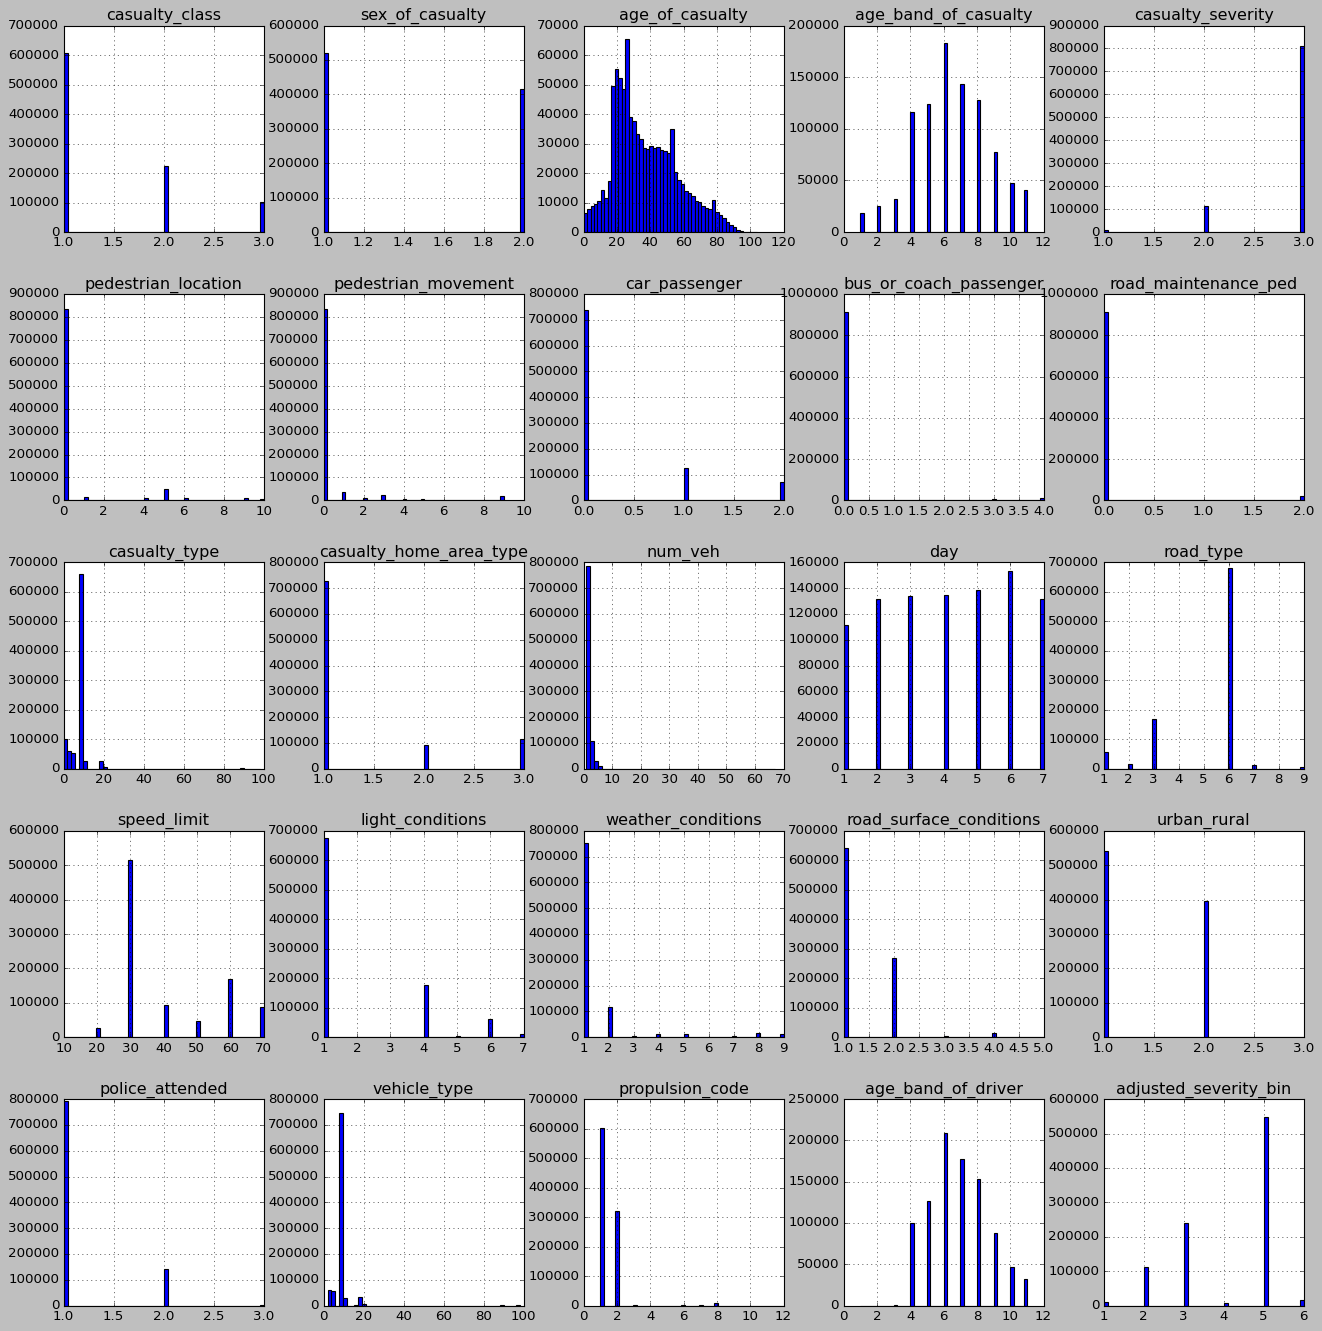

In [7]:
# visualise dataset
plt.style.use("classic")
cas.hist(bins=50, figsize=(20,20))
plt.savefig("./plots/cas_hist1.png")
plt.show()

In [8]:
# get skewness of attributes
cas.skew().sort_values(ascending=False)

num_veh                    18.261209
vehicle_type               11.233288
casualty_type               7.588401
bus_or_coach_passenger      6.729265
road_maintenance_ped        6.058428
propulsion_code             5.369828
pedestrian_movement         4.675755
weather_conditions          3.706876
pedestrian_location         3.349875
road_surface_conditions     2.131575
police_attended             2.006019
car_passenger               1.948444
casualty_home_area_type     1.716774
light_conditions            1.346145
casualty_class              1.177839
speed_limit                 0.784265
age_of_casualty             0.591847
age_band_of_driver          0.342897
urban_rural                 0.315665
sex_of_casualty             0.224737
age_band_of_casualty       -0.022205
day                        -0.075057
adjusted_severity_bin      -0.655274
road_type                  -1.283765
casualty_severity          -2.617983
dtype: float64

#### Initial Thoughts
From reviewing the histograms, there are very few normally distributed attributes in the dataset.

For these attributes I will consider dropping, normalising, or retaining the attributes.

Some attributes that could be potentially dropped altogether for lack of value, could be:
- pedestrian location + pedestrian movement
- bus or coach pedestrian
- road maintenance pedestrian

### Creating Train and  Sets

In [9]:
# create test and train split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cas, test_size=0.2, random_state = 1)

In [10]:
print(len(train_set), len(test_set))

747468 186867


## Review Attributes

Each attribute to be reviewed individually in preparation and any required adjustments applied.

In [11]:
# split
cas.casualty_class.value_counts() / len(cas.casualty_class)

1    0.650536
2    0.241021
3    0.108443
Name: casualty_class, dtype: float64

In [12]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934335 entries, 0 to 934334
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   casualty_class           934335 non-null  int64  
 1   sex_of_casualty          934335 non-null  int64  
 2   age_of_casualty          934335 non-null  int64  
 3   age_band_of_casualty     934335 non-null  int64  
 4   casualty_severity        934335 non-null  int64  
 5   pedestrian_location      934335 non-null  int64  
 6   pedestrian_movement      934335 non-null  int64  
 7   car_passenger            934335 non-null  int64  
 8   bus_or_coach_passenger   934335 non-null  int64  
 9   road_maintenance_ped     934335 non-null  int64  
 10  casualty_type            934335 non-null  int64  
 11  casualty_home_area_type  934335 non-null  int64  
 12  num_veh                  934335 non-null  int64  
 13  date                     934335 non-null  object 
 14  day 

### 0 casualty_class
Class of casualty:
1. Driver or Rider
2. Passenger
3. Pedestrian

### sex_of_casualty
The sex of the casualty

1. Male
2. Female

Categorical datatype, onehotencoding for this attribute.
`dtype = "category"`

### age_of_casualty
Continuous value 
No encoding here - can i use these??

### age_band_of_casualty

categorical - onehotencoding?

### casualty_severity
1. fatal
2. serious
3. slight

### DROP columns without value

- pedestrian_location
- pedestrian_movement
- bus_or_coach_passenger
- road_maintenance_ped

In [13]:
# drop columns
drop_cols = ["pedestrian_location", "pedestrian_movement", "bus_or_coach_passenger","road_maintenance_ped"]
cas_drop = cas.drop(drop_cols, axis="columns")
cas_drop.columns

Index(['casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'car_passenger',
       'casualty_type', 'casualty_home_area_type', 'num_veh', 'date', 'day',
       'time', 'road_type', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'urban_rural',
       'police_attended', 'vehicle_type', 'propulsion_code',
       'age_band_of_driver', 'adjusted_severity_bin'],
      dtype='object')

In [14]:
cas_drop.casualty_type.value_counts()

9     644876
0     101322
3      45747
5      41913
19     25909
11     23654
8      14873
2      13493
4      12996
21      4344
90      1495
20      1362
10      1339
17       517
97       269
98       118
23        78
22        30
Name: casualty_type, dtype: int64